<a href="https://colab.research.google.com/github/RonakMehta21/FastAI-Keras-Colabs/blob/master/FastAI_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection using FastAI

This Colab Notebook uses [CIFAR-10](https://http://www.cs.toronto.edu/~kriz/cifar.html) dataset collected by by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton which consists of 50000 training images and 10000 test images. This dataset has 60000 32x32 colour images in 10 classes, with 6000 images per class. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another.

The below three lines ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import necessary packages. [Fastai V1](https://www.fast.ai/2018/10/02/fastai-ai/) library is used which sits on top of [PyTorch 1.0](https://https://pytorch.org/).

In [0]:
from fastai import *
from fastai.vision import *
# Batch size
bs = 64

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, then run the batch size with 16, `bs=16`.

In [3]:
path = untar_data(URLs.CIFAR);path

PosixPath('/root/.fastai/data/cifar10')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train')]

We can store the training and testing dataset in different paths.

In [0]:
path_test = path/'test'
path_train = path/'train'

In [6]:
path_test.ls()

[PosixPath('/root/.fastai/data/cifar10/test/truck'),
 PosixPath('/root/.fastai/data/cifar10/test/horse'),
 PosixPath('/root/.fastai/data/cifar10/test/frog'),
 PosixPath('/root/.fastai/data/cifar10/test/ship'),
 PosixPath('/root/.fastai/data/cifar10/test/dog'),
 PosixPath('/root/.fastai/data/cifar10/test/deer'),
 PosixPath('/root/.fastai/data/cifar10/test/cat'),
 PosixPath('/root/.fastai/data/cifar10/test/automobile'),
 PosixPath('/root/.fastai/data/cifar10/test/airplane'),
 PosixPath('/root/.fastai/data/cifar10/test/bird')]

In [7]:
path_train.ls()

[PosixPath('/root/.fastai/data/cifar10/train/truck'),
 PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/dog'),
 PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/cat'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/bird')]

In [8]:
doc(ImageDataBunch)

`from_folder()` takes Train, Validation and Test Data. Since Test is optinal. Passing `test` to Validation paramter.

In [0]:
data = ImageDataBunch.from_folder(path=path,train='train',valid='test',size=224,ds_tfms=get_transforms(),bs=bs).normalize(cifar_stats)

To understand how the data looks like and check how the images are labelled.

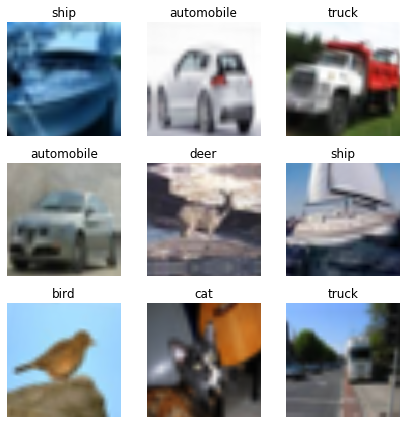

In [10]:
data.show_batch(rows=3, figsize=(6,6))

`data.c` counts the different classes the dataset contains.

In [11]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

We use ResNet-34 model to train our convolutional Neural Network.

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

`fit_one_cycle()` takes the number of epochs paramerter. In short, the number of times you want to train the model.

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.563542,0.345181,0.117700,06:26
1,0.340999,0.207143,0.071200,06:15
2,0.247341,0.168262,0.059200,06:11
3,0.227249,0.157599,0.054700,06:09


`learn.save()` saves the weights of the model.

In [0]:
learn.save('stage-1')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

To interpret which kind of images the model is confused with.

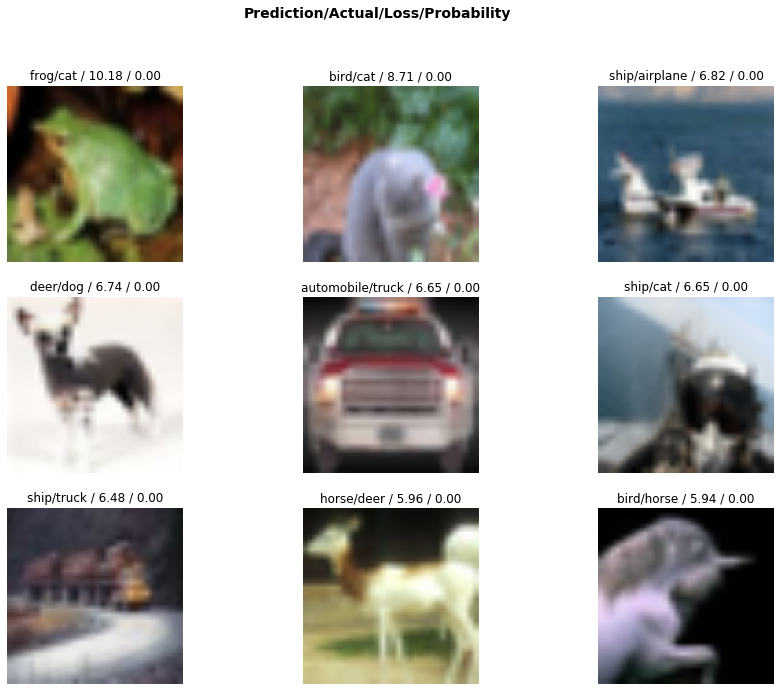

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

The cofusion matrix shows some of the categories the model is confused with.

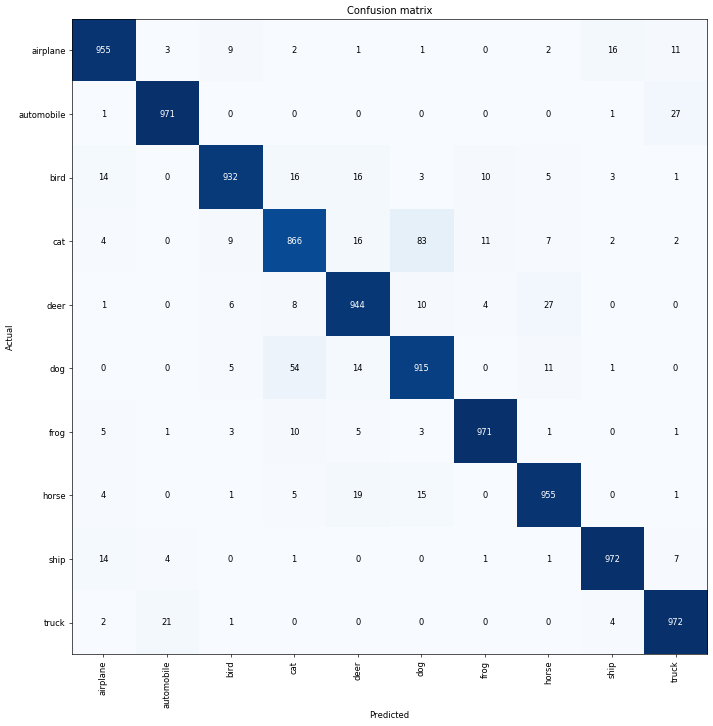

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

The below output shows the number of times the model got confused with which types of categories.

In [22]:
interp.most_confused(min_val=2)

[('cat', 'dog', 83),
 ('dog', 'cat', 54),
 ('automobile', 'truck', 27),
 ('deer', 'horse', 27),
 ('truck', 'automobile', 21),
 ('horse', 'deer', 19),
 ('airplane', 'ship', 16),
 ('bird', 'cat', 16),
 ('bird', 'deer', 16),
 ('cat', 'deer', 16),
 ('horse', 'dog', 15),
 ('bird', 'airplane', 14),
 ('dog', 'deer', 14),
 ('ship', 'airplane', 14),
 ('airplane', 'truck', 11),
 ('cat', 'frog', 11),
 ('dog', 'horse', 11),
 ('bird', 'frog', 10),
 ('deer', 'dog', 10),
 ('frog', 'cat', 10),
 ('airplane', 'bird', 9),
 ('cat', 'bird', 9),
 ('deer', 'cat', 8),
 ('cat', 'horse', 7),
 ('ship', 'truck', 7),
 ('deer', 'bird', 6),
 ('bird', 'horse', 5),
 ('dog', 'bird', 5),
 ('frog', 'airplane', 5),
 ('frog', 'deer', 5),
 ('horse', 'cat', 5),
 ('cat', 'airplane', 4),
 ('deer', 'frog', 4),
 ('horse', 'airplane', 4),
 ('ship', 'automobile', 4),
 ('truck', 'ship', 4),
 ('airplane', 'automobile', 3),
 ('bird', 'dog', 3),
 ('bird', 'ship', 3),
 ('frog', 'bird', 3),
 ('frog', 'dog', 3),
 ('airplane', 'cat', 2),


With `unfreeze()` the weights can be changed with subsequent training of the model.

In [0]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.225925,0.148509,0.049200,07:09


The Error rate still reduced.

In [0]:
learn.load('stage-1');

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


The below graph shows the learning rate of the model.

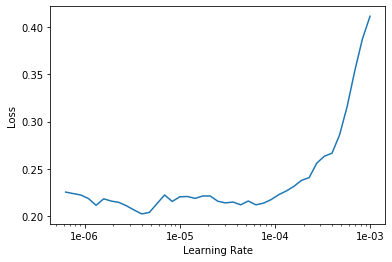

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.197708,0.139940,0.050400,07:05
1,0.139915,0.116082,0.040000,06:49


## ResNet-34 gives 96% accuracy.

#Training: resnet50

This model contains 50 Layers instead of 34.

In [0]:
data = ImageDataBunch.from_folder(path=path,train='train',valid='test',size=299, bs=bs//2).normalize(cifar_stats)

In [31]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


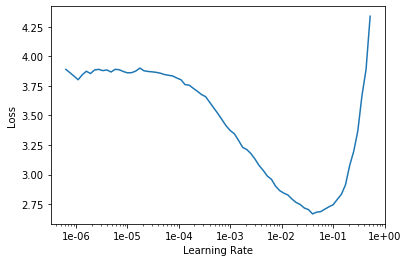

In [32]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.571690,0.440750,0.149700,15:53
1,0.321317,0.251033,0.082400,15:53
2,0.272222,0.198868,0.067400,15:53
3,0.180590,0.171191,0.057400,15:54
4,0.162393,0.167404,0.055200,15:53
5,0.114103,0.162956,0.053000,15:54
6,0.072568,0.159744,0.051000,15:53
7,0.051013,0.157451,0.049700,15:55


In [0]:
learn.save('stage-1-50')

Running the ResNet50 Model for multiple epochs can give less error_rate